# Transfer Learning


## Convolutional Neural Networks

---

In this notebook, we use transfer learning to train a CNN to classify dog breeds.

### 1. Load Dog Dataset

Before running the code cell below, download the dataset of dog images [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) and place it in the respository.

In [ ]:
# !pip install opencv-python

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from keras.layers import Dense, Flatten
from keras.models import Sequential

import tensorflow as tf
import keras as ks

print(tf. __version__) 
print(ks. __version__) 

2.8.2
2.8.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    # dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    # return dog_files, dog_targets
    return dog_targets

train_targets = load_dataset('/content/drive/MyDrive/dogImages/train')
valid_targets = load_dataset('/content/drive/MyDrive/dogImages/valid')
test_targets =  load_dataset('/content/drive/MyDrive/dogImages/test')

np.savetxt("/content/drive/MyDrive/dogimages_reduced/train_targets.csv", train_targets, delimiter=",")
np.savetxt("/content/drive/MyDrive/dogimages_reduced/valid_targets.csv", valid_targets, delimiter=",")
np.savetxt("/content/drive/MyDrive/dogimages_reduced/test_targets.csv", test_targets, delimiter=",")


# # load ordered list of dog names
# dog_names = [item[25:-1] for item in glob('dogImages/train/*/')]

# # print statistics about the dataset
# print('There are %d total dog categories.' % len(dog_names))
# print('There are %s total dog images.\n' % str(len(train_files) + len(valid_files) + len(test_files)))
# print('There are %d training dog images.' % len(train_files))
# print('There are %d validation dog images.' % len(valid_files))
# print('There are %d test dog images.'% len(test_files))

In [6]:
train_targets_ = np.genfromtxt('/content/drive/MyDrive/dogimages_reduced/train_targets.csv', delimiter=',')
valid_targets_ = np.genfromtxt('/content/drive/MyDrive/dogimages_reduced/valid_targets.csv', delimiter=',')
test_targets_ = np.genfromtxt('/content/drive/MyDrive/dogimages_reduced/test_targets.csv', delimiter=',')

### 2. Visualize the First 12 Training Images

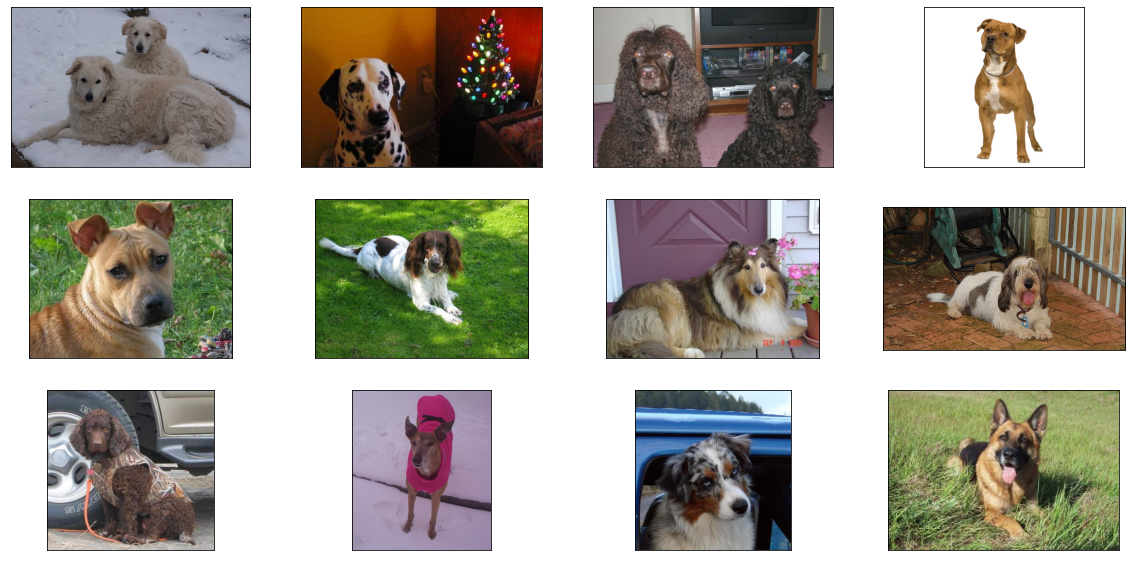

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# %matplotlib inline

# def visualize_img(img_path, ax):
#     img = cv2.imread(img_path)
#     ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
# fig = plt.figure(figsize=(20, 10))
# for i in range(12):
#     ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
#     visualize_img(train_files[i], ax)

### 3. Obtain the VGG-16 Bottleneck Features

Before running the code cell below, download the file linked [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz) and place it in the `bottleneck_features/` folder.

In [7]:
bottleneck_features = np.load('/content/drive/MyDrive/AML_TL_SAMPLE_IMAGES/DogVGG16Data.npz')
train_vgg16 = bottleneck_features['train']
valid_vgg16 = bottleneck_features['valid']
test_vgg16 = bottleneck_features['test']

### 4. Define a Model Architecture (Model 1)

In [ ]:
# # from keras.backend import dropout
# from tensorflow.keras.layers import Dropout
# model = Sequential()
# model.add(Flatten(input_shape=(7, 7, 512)))
# model.add(Dense(586, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(586, activation='relu'))
# model.add(Dense(133, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', 
#                   metrics=['accuracy'])
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 586)               14702154  
                                                                 
 dropout (Dropout)           (None, 586)               0         
                                                                 
 dense_3 (Dense)             (None, 586)               343982    
                                                                 
 dense_4 (Dense)             (None, 133)               78071     
                                                                 
Total params: 15,124,207
Trainable params: 15,124,207
Non-trainable params: 0
_________________________________________________________________


### 5. Define another Model Architecture (Model 2)

In [8]:
from keras.layers import GlobalAveragePooling2D

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7, 7, 512)))
model.add(Dense(256, activation='relu'))
model.add(Dense(133, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', 
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 133)               34181     
                                                                 
Total params: 165,509
Trainable params: 165,509
Non-trainable params: 0
_________________________________________________________________


### 7. Train the Model (Model 2)

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='dogvgg16.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(train_vgg16, train_targets_, epochs=200, validation_data=(valid_vgg16, valid_targets_), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/200
197/209 [===========================>..] - ETA: 0s - loss: 3.7111 - accuracy: 0.3133
Epoch 1: val_loss improved from inf to 1.70517, saving model to dogvgg16.weights.best.hdf5
209/209 [==============================] - 4s 6ms/step - loss: 3.5930 - accuracy: 0.3280 - val_loss: 1.7052 - val_accuracy: 0.5461
Epoch 2/200
205/209 [============================>.] - ETA: 0s - loss: 0.9734 - accuracy: 0.7168
Epoch 2: val_loss improved from 1.70517 to 1.19660, saving model to dogvgg16.weights.best.hdf5
209/209 [==============================] - 1s 5ms/step - loss: 0.9700 - accuracy: 0.7169 - val_loss: 1.1966 - val_accuracy: 0.6635
Epoch 3/200
209/209 [==============================] - ETA: 0s - loss: 0.4931 - accuracy: 0.8466
Epoch 3: val_loss improved from 1.19660 to 1.11514, saving model to dogvgg16.weights.best.hdf5
209/209 [==============================] - 1s 5ms/step - loss: 0.4931 - accuracy: 0.8466 - val_loss: 1.1151 - val_accuracy: 0.7030
Epoch 4/200
203/209 [==============

### 8. Load the Model with the Best Validation Accuracy (Model 2)

In [10]:
# load the weights that yielded the best validation accuracy
model.load_weights('dogvgg16.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set (Model 2)

In [11]:
# get index of predicted dog breed for each image in test set
vgg16_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) 
                     for feature in test_vgg16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(vgg16_predictions)==
                           np.argmax(test_targets_, axis=1))/len(vgg16_predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy)


Test accuracy: 71.1722%
